# Project Introduction:
### The given dataset represents Employee performance data from INX Future Inc.
### Sufficient effort is made to clearly understand the goals of the analysis and target outcomes for INX Future Inc.
### The approach is to first explore the dataset, decide appropriate treatement of the dataset and then address the four desired insights from this project.
### 1. Department wise performances.
### 2. Top 3 Important Factors effecting employee performance.
### 3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
### 4. Recommendations to improve the employee performance based on insights from analysis.

### Submitted by : 
#### Name : Vivek Choudhury
#### Institute: Datamites.
#### Contact: +918494833332
#### Email: vivek.choudhury112@gmail.com

In [195]:
#Importing required libraries: Pandas, Numpy, Matplotlib and Seaborn.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
#Reading CSV file
data=pd.read_csv("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv")

In [197]:
#Checking if there are missing values.
data.isnull().any()

EmpNumber                       False
Age                             False
Gender                          False
EducationBackground             False
MaritalStatus                   False
EmpDepartment                   False
EmpJobRole                      False
BusinessTravelFrequency         False
DistanceFromHome                False
EmpEducationLevel               False
EmpEnvironmentSatisfaction      False
EmpHourlyRate                   False
EmpJobInvolvement               False
EmpJobLevel                     False
EmpJobSatisfaction              False
NumCompaniesWorked              False
OverTime                        False
EmpLastSalaryHikePercent        False
EmpRelationshipSatisfaction     False
TotalWorkExperienceInYears      False
TrainingTimesLastYear           False
EmpWorkLifeBalance              False
ExperienceYearsAtThisCompany    False
ExperienceYearsInCurrentRole    False
YearsSinceLastPromotion         False
YearsWithCurrManager            False
Attrition   

In [198]:
# Visualizing first five records of the dataset.
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [199]:
# Checking dimensions of the dataset, rows x columns.
data.shape

(1200, 28)

In [200]:
# Checking datatype.
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [201]:
#displaying categorical features
for features , datatype in zip(data.columns , data.dtypes):
    if datatype == 'object':
        print(features)

EmpNumber
Gender
EducationBackground
MaritalStatus
EmpDepartment
EmpJobRole
BusinessTravelFrequency
OverTime
Attrition


In [202]:
#Counting total number of employees with Performance Rating: 2, 3 & 4
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

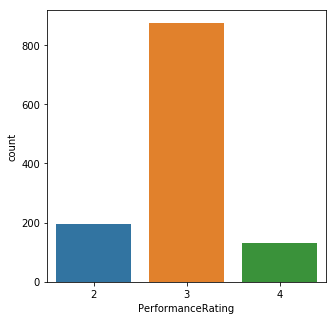

In [203]:
#Visualization of Performance ratings distribution count
plt.figure(figsize=(5,5))
sns.countplot(x='PerformanceRating',data=data);

### <span style='color:blue'>1) Insight No.1 from the analysis: Department wise performances</span>
### First step would be to check total employees in each department and then to check department wise distribution of performance ratings.
### We do this by using the value.counts function.

In [204]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [205]:
#Department wise performances
print(data.groupby('EmpDepartment').PerformanceRating.value_counts())

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64


In [206]:
from keras_preprocessing.image import load_img

In [207]:
img = load_img('/Users/vivek/Desktop/EmplRatingDepart.png')

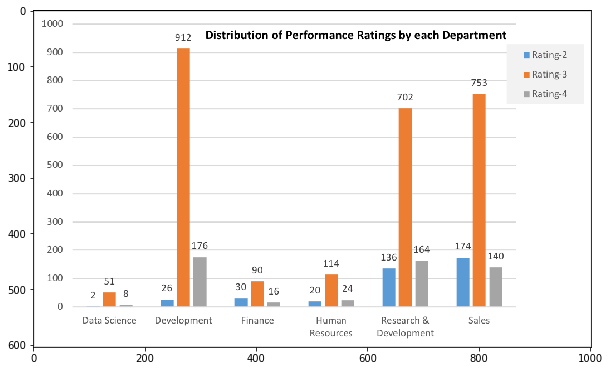

In [208]:
# Performance Rating by Department: visualization.
plt.imshow(img)
plt.show()

### 2) Identifying Top 3 Important Factors affecting employee performance

In [209]:
#Checking correlation helps identify mutual relationship or association between variables.
#Here we check the correlation between features and Performance Rating.
data.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


In [210]:
#Checking class count.
#Mapping the frequency of education background of employees.
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

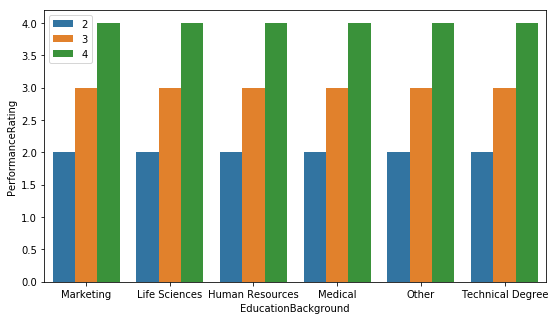

EducationBackground  PerformanceRating
Human Resources      3                     16
                     2                      3
                     4                      2
Life Sciences        3                    357
                     2                     78
                     4                     57
Marketing            3                     94
                     2                     29
                     4                     14
Medical              3                    281
                     2                     63
                     4                     40
Other                3                     56
                     4                      7
                     2                      3
Technical Degree     3                     70
                     2                     18
                     4                     12
Name: PerformanceRating, dtype: int64


In [211]:
#Relationship between target Performance Rating and EducationBackground
from matplotlib import rcParams
rcParams['figure.figsize'] = 9,5
sns.barplot(x='EducationBackground',y='PerformanceRating', hue="PerformanceRating", data=data)
plt.legend(loc='upper left')
plt.show()
print(data.groupby('EducationBackground').PerformanceRating.value_counts())

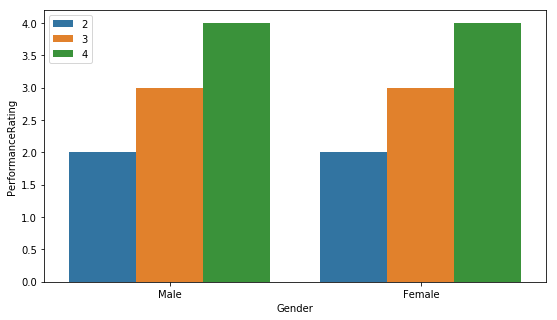

Gender  PerformanceRating
Female  3                    349
        2                     75
        4                     51
Male    3                    525
        2                    119
        4                     81
Name: PerformanceRating, dtype: int64


In [212]:
#plotting images with colors
#relationship between target and Gender
from matplotlib import rcParams
rcParams['figure.figsize'] = 9,5
sns.barplot(x='Gender',y='PerformanceRating', hue="PerformanceRating", data=data)
plt.legend(loc='upper left')
plt.show()
print(data.groupby('Gender').PerformanceRating.value_counts())

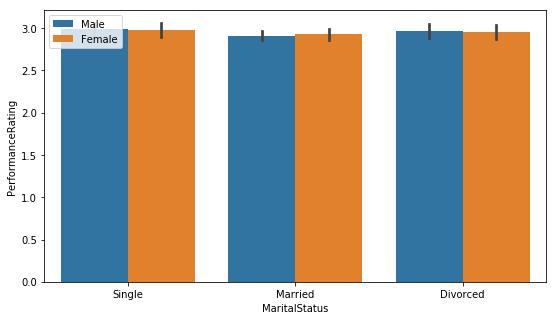

MaritalStatus  PerformanceRating
Divorced       3                    205
               2                     37
               4                     26
Married        3                    393
               2                    100
               4                     55
Single         3                    276
               2                     57
               4                     51
Name: PerformanceRating, dtype: int64


In [213]:
#relationship between target and MaritalStatus
from matplotlib import rcParams
rcParams['figure.figsize'] = 9,5
sns.barplot(x='MaritalStatus',y='PerformanceRating', hue="Gender", data=data)
plt.legend(loc='upper left')
plt.show()
print(data.groupby('MaritalStatus').PerformanceRating.value_counts())

In [214]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

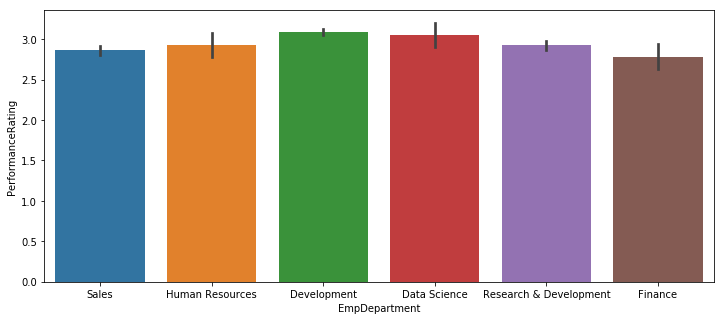

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64


In [215]:
#relationship between target and EmpDepartment
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,5
sns.barplot(x='EmpDepartment',y='PerformanceRating', data=data)
plt.show()
print(data.groupby('EmpDepartment').PerformanceRating.value_counts())

In [216]:
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

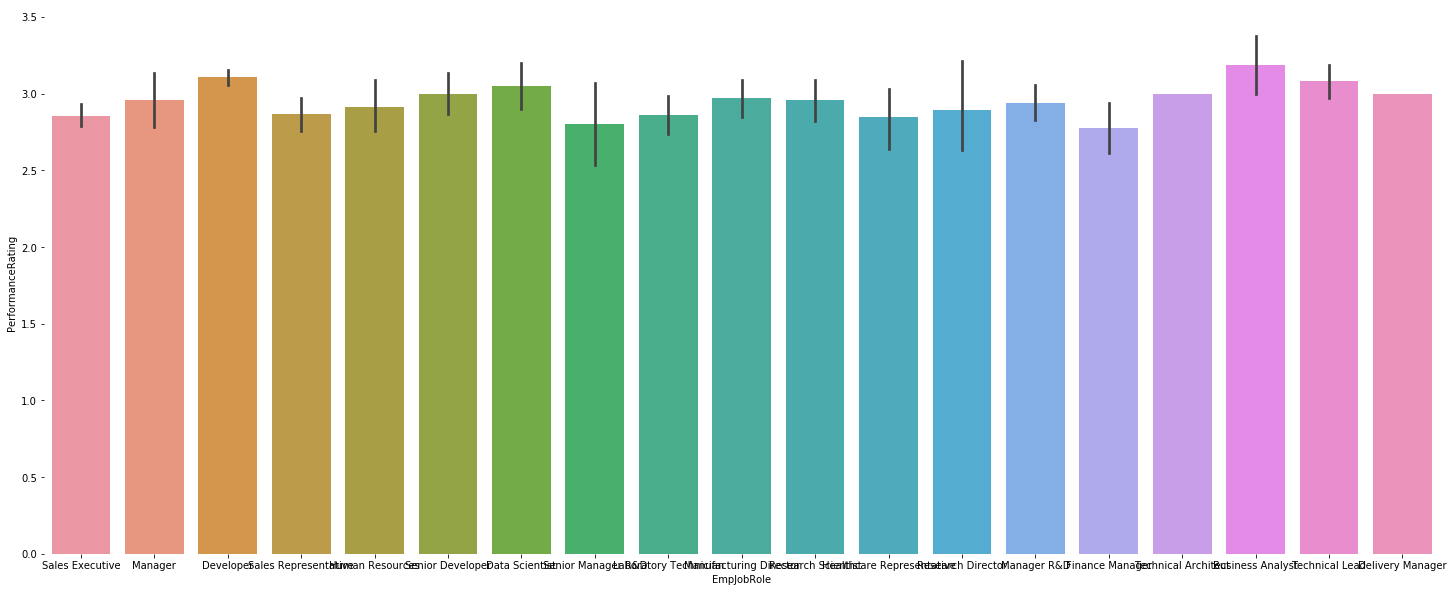

EmpJobRole                 PerformanceRating
Business Analyst           3                     13
                           4                      3
Data Scientist             3                     17
                           4                      2
                           2                      1
Delivery Manager           3                     12
Developer                  3                    199
                           4                     31
                           2                      6
Finance Manager            3                     30
                           2                     15
                           4                      4
Healthcare Representative  3                     22
                           2                      8
                           4                      3
Human Resources            3                     31
                           2                      9
                           4                      5
Laboratory Technici

In [217]:
#relationship between target and EmpJobRole
from matplotlib import rcParams
rcParams['figure.figsize'] = 25,10
sns.barplot(x='EmpJobRole',y='PerformanceRating',data=data)
sns.despine(left=True, bottom=True)
plt.show()
print(data.groupby('EmpJobRole').PerformanceRating.value_counts())

In [218]:
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

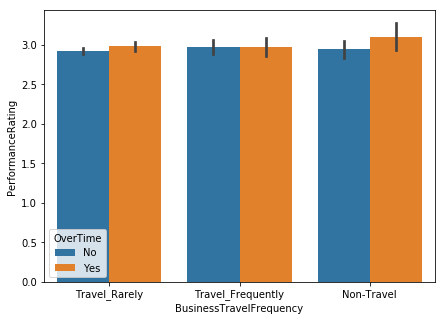

BusinessTravelFrequency  PerformanceRating
Non-Travel               3                     93
                         2                     21
                         4                     18
Travel_Frequently        3                    154
                         2                     37
                         4                     31
Travel_Rarely            3                    627
                         2                    136
                         4                     83
Name: PerformanceRating, dtype: int64


In [219]:
#relationship between target and BusinessTravelFrequency
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,5
sns.barplot(x='BusinessTravelFrequency',y='PerformanceRating',hue='OverTime' ,data=data)
plt.show()
print(data.groupby('BusinessTravelFrequency').PerformanceRating.value_counts())

In [220]:
data.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [221]:
data.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

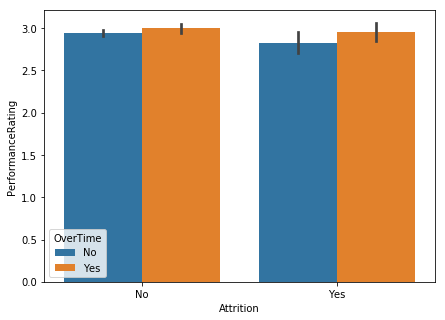

Attrition  PerformanceRating
No         3                    750
           2                    158
           4                    114
Yes        3                    124
           2                     36
           4                     18
Name: PerformanceRating, dtype: int64


In [222]:
#relationship between target and Attrition
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,5
sns.barplot(x='Attrition',y='PerformanceRating',hue='OverTime' ,data=data)
plt.show()
print(data.groupby('Attrition').PerformanceRating.value_counts())

In [223]:
#assinging data
df = data

In [224]:
#handeling catagorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df.Gender = labelEncoder.fit_transform(df.Gender)
df.EducationBackground = labelEncoder.fit_transform(df.EducationBackground)
df.MaritalStatus = labelEncoder.fit_transform(df.MaritalStatus)
df.EmpDepartment = labelEncoder.fit_transform(df.EmpDepartment)
df.BusinessTravelFrequency = labelEncoder.fit_transform(df.BusinessTravelFrequency)
df.Attrition = labelEncoder.fit_transform(df.Attrition)
df.OverTime = labelEncoder.fit_transform(df.OverTime)

In [225]:
#creaing dummy variables
EmpJobRole_dummy = pd.get_dummies(df.EmpJobRole).drop('Technical Architect',axis=1)

In [226]:
#concating dummy variables to dataframe
df = df.drop("EmpJobRole",axis=1)
df = pd.concat([df , EmpJobRole_dummy],axis=1)

In [227]:
df.shape

(1200, 45)

In [228]:
#setting up dependent and independent variables
X = df.drop(['PerformanceRating','EmpNumber'],axis=1)
y = df['PerformanceRating']

In [229]:
#saving the column names
col = X.columns

In [230]:
#normalization of data
from sklearn.preprocessing import scale
X = scale(X)

In [231]:
X = pd.DataFrame(data=X , columns=col)

In [232]:
#splitting data into train test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [233]:
#Defining Random Forest model
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=17)

In [234]:
#Training the model
random_forest_model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [235]:
#Predicting the y-target
y_predict = random_forest_model.predict(X_test)

In [236]:
#Accuaray checking
from sklearn.metrics import accuracy_score , confusion_matrix
random_forest_model_acc = accuracy_score(y_test , y_predict)
print(random_forest_model_acc)

0.9041666666666667


## <span style='color:blue'>We achieved 91% efficiency using the Random Forest model, without feature selection.</span>

In [237]:
confusion_matrix(y_test , y_predict)

array([[ 26,   3,   0],
       [  4, 177,   3],
       [  0,  13,  14]])

In [238]:
#getting feature importance for feature selection
importance = random_forest_model.feature_importances_

In [239]:
#creating dataframe for feature importance
feature_importance = pd.DataFrame({"Columns":col , "Degree of impact":importance})
feature_importance = feature_importance.sort_values('Degree of impact',ascending=True)

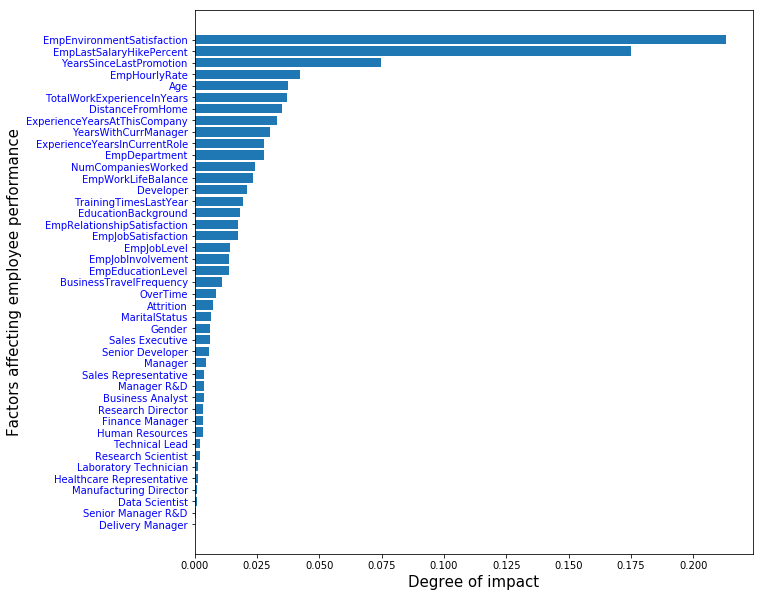

In [240]:
#visulizing feature importance 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10
plt.barh(range(len(feature_importance['Degree of impact'])), feature_importance['Degree of impact'])
plt.yticks(range(len(feature_importance['Columns'])), feature_importance['Columns'],color='blue',fontsize=10)
plt.xlabel("Degree of impact",fontsize=15)
plt.ylabel("Factors affecting employee performance",fontsize=15)
plt.show()

In [241]:
#removing less importance features
cols = EmpJobRole_dummy.columns

In [242]:
#selected features
XX_train = X_train.drop(cols , axis=1)
XX_test  = X_test.drop(cols , axis=1)

In [243]:
#Deleting overtime and Attrition
XX_train = XX_train.drop(['OverTime','Attrition'] , axis=1)
XX_test  = XX_test.drop(['OverTime','Attrition'] , axis=1)

In [244]:
#Defining Random Forest with feature enginerring model
random_forest_model2 = RandomForestClassifier(n_estimators=19)

In [245]:
#Training model
random_forest_model2.fit(XX_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [246]:
#Predicting y-target
yy_predict = random_forest_model2.predict(XX_test)

In [247]:
random_forest_model2_acc = accuracy_score(y_test , yy_predict)
print(random_forest_model2_acc)

0.9375


## <span style='color:blue'>We achieved 94% efficiency using the Random Forest model, with feature selection.</span>

In [248]:
confusion_matrix(y_test , yy_predict)

array([[ 23,   6,   0],
       [  1, 183,   0],
       [  0,   8,  19]])

In [249]:
from sklearn.neighbors import KNeighborsClassifier
knn_model3 = KNeighborsClassifier(n_neighbors=5)

In [250]:
knn_model3.fit(XX_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [251]:
y_predict_knn = knn_model3.predict(XX_test)

In [252]:
knn_model3_acc=accuracy_score(y_test , y_predict_knn)
print(knn_model3_acc)

0.8125


## <span style='color:blue'>We achieved 81% efficiency using the K-Nearest Neighbours model, with feature selection.</span>

In [253]:
confusion_matrix(y_test , y_predict_knn)

array([[  9,  20,   0],
       [  6, 176,   2],
       [  2,  15,  10]])

In [254]:
#Selecting the most effecient model with 93.75% accuracy.
pd.DataFrame({"model":["random_forest_model","random_forest_model2","knn_model3"],
             "accuracy":[random_forest_model_acc,random_forest_model2_acc,knn_model3_acc]})

,accuracy,model
0,0.904167,random_forest_model
1,0.937500,random_forest_model2
2,0.812500,knn_model3


### With 93% efficiency, we recommend Random Forest model to predict Employee Performance based on factors as inputs. This model could be used ato improve hiring decisions.

# <span style='color:blue'>Recommendations improve the employee performance based on insights from analysis.<span>

### 1) Candidates between 31years to 40 years of age tend to Perform better at Ranking 4.
### 2) Candidates with +15 years total experience tend to be average performers. (Rating3)
### 3) Candidates with 12 to 15 years of experience show higher probability of better performance (Rating4)
### 4) Candidates with 1 year of experience have very high probaility of high-performance (Rating4) however, these candidates also have at least 50% probability of attrition.

